In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [2]:
# Load dataset
data_file = "stress.csv"
data = pd.read_csv(data_file)

# Display the first few rows of the dataset
print(data.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [ ]:
# Download required NLTK resources
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

In [5]:
# Prepare stopwords set
stop_words = set(stopwords.words('english'))

In [6]:
# Function to clean text data
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove anything in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    text = [word for word in text.split(' ') if word not in stop_words]  # Remove stopwords
    text = " ".join(text)  # Rejoin the words
    text = [stemmer.stem(word) for word in text.split(' ')]  # Stem words
    text = " ".join(text)  # Rejoin the stemmed words
    return text

In [7]:
# Apply text preprocessing
data["text"] = data["text"].apply(preprocess_text)

In [8]:
# Generate word cloud to visualize most frequent words
all_text = " ".join(data["text"])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(all_text)


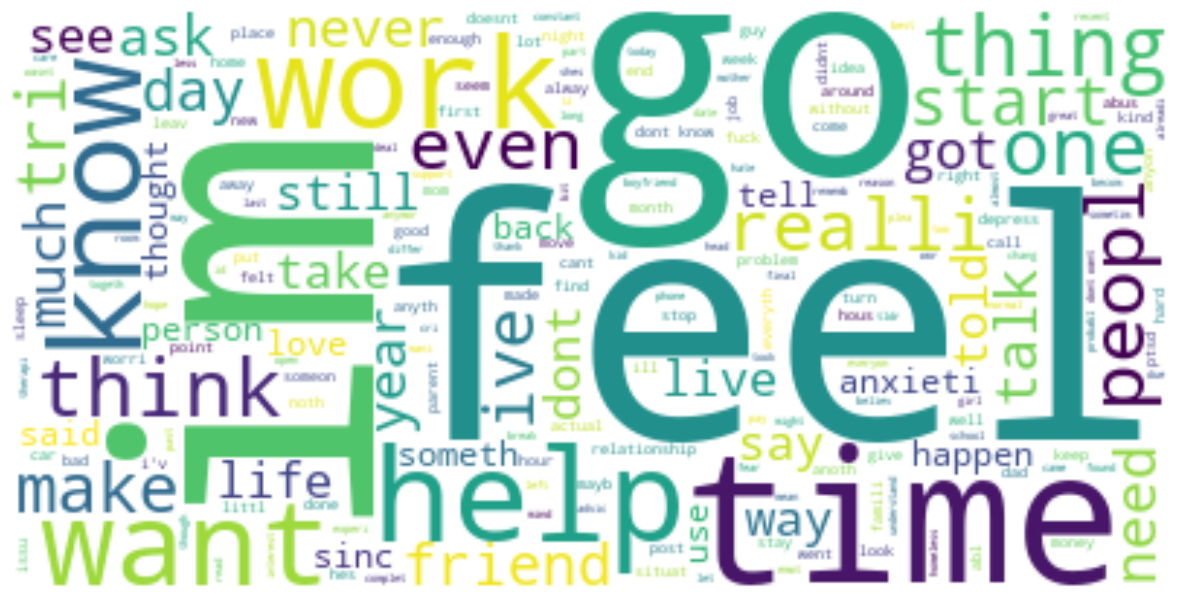

In [9]:
# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# Map labels to meaningful text
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})

In [11]:
# Retain only relevant columns
data = data[["text", "label"]]

In [12]:
# Print the cleaned data sample
print(data.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [13]:
# Prepare features and labels for model training
X = np.array(data["text"])
y = np.array(data["label"])

In [14]:
# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_features = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.33, random_state=42)

In [15]:
# Initialize and train the Naive Bayes model
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

In [17]:
# Predict on a sample user input
user_input = "I woke up late, missed my train, and now I'm running behind on every deadline, trying to juggle everything at once, and it feels like there's just no time to breathe."
user_input_transformed = vectorizer.transform([user_input]).toarray()
prediction = classifier.predict(user_input_transformed)
# Output the prediction result
print(f"The prediction for the given input is: {prediction[0]}")

The prediction for the given input is: Stress


In [18]:
# Predict on a sample user input
user_input = str(input())
user_input_transformed = vectorizer.transform([user_input]).toarray()
prediction = classifier.predict(user_input_transformed)
# Output the prediction result
print(f"The prediction for the given input is: {prediction[0]}")

The prediction for the given input is: No Stress
